## Task 1 (Image clustering)

In [55]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
image = imread('NyanCat1.jpg')

In [57]:
image.shape

(1080, 1920, 3)

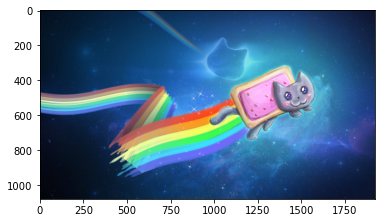

In [58]:
fig = plt.figure()
plt.imshow(image)

In [59]:
ind = np.indices(image.shape [:2]).transpose(1,2,0)
features = np.dstack((ind,image)).reshape (-1,5)

In [60]:
from sklearn.cluster import KMeans
import numpy as np

In [61]:
#k Means method

In [62]:
image = image/255
image.shape

(1080, 1920, 3)

In [63]:
X = image.reshape(-1,3)
X.shape

(2073600, 3)

In [64]:
#Segmentation

In [75]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [71]:
img_seg = kmeans.cluster_centers_
img_seg

array([[0.06696873, 0.20906288, 0.38487834],
       [0.26630768, 0.59560241, 0.82122005],
       [0.89049017, 0.42544233, 0.24322957],
       [0.94624903, 0.69505146, 0.91924298],
       [0.02809212, 0.075849  , 0.14804004],
       [0.15147865, 0.3609216 , 0.59975957],
       [0.33071565, 0.78218668, 0.9033442 ],
       [0.79091552, 0.64082198, 0.46062037],
       [0.1049543 , 0.27435737, 0.49573193],
       [0.04463313, 0.13682502, 0.26413775],
       [0.2965863 , 0.90428687, 0.47982928],
       [0.89808436, 0.92726591, 0.59890165],
       [0.51229795, 0.38464629, 0.43065912],
       [0.640498  , 0.65823161, 0.70624824],
       [0.37321358, 0.45603366, 0.91793273],
       [0.1968908 , 0.47433203, 0.71337932]])

In [72]:
img_seg = img_seg[kmeans.labels_]
img_seg

array([[0.02809212, 0.075849  , 0.14804004],
       [0.02809212, 0.075849  , 0.14804004],
       [0.02809212, 0.075849  , 0.14804004],
       ...,
       [0.02809212, 0.075849  , 0.14804004],
       [0.02809212, 0.075849  , 0.14804004],
       [0.02809212, 0.075849  , 0.14804004]])

In [73]:
img_seg = img_seg.reshape(image.shape)

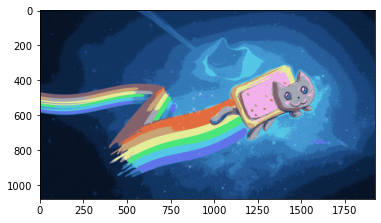

In [74]:
plt.figure()
plt.imshow(img_seg)

## Task 2 (Determine the optimal number of clusters)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [10]:
# importing the dataset
X = pd.read_csv('elbow.txt', sep = "\t", header= None, decimal = "," )
X.head()

,0,1
0,-2.747711,3.575680
1,-1.939473,1.658946
2,-2.264922,2.754515
3,-1.963531,3.247520
4,-1.379661,2.885197


In [11]:
X.tail()

,0,1
495,3.558242,-4.000983
496,3.048096,-3.715931
497,3.680559,-3.891622
498,1.598255,-3.651863
499,2.982779,-4.083988


In [12]:
# applying the elbow method
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

# building the model, calculating the values of distortion and inertia for each value of k in the given range
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

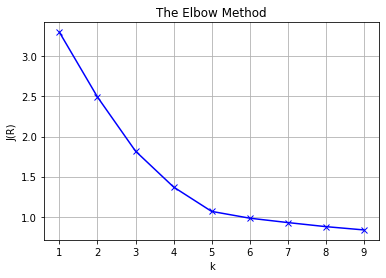

In [13]:
# visualising the results
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('J(R)')
plt.title('The Elbow Method')
plt.grid()
plt.show()

The optimal number of clusters is 5 because starting from 5 the J(R) value does not decrease sharply as before.

In [14]:
# repeating the search with silhouette score using the metrics module of the sklearn library
sil = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil[k]= metrics.silhouette_score(X, labels)

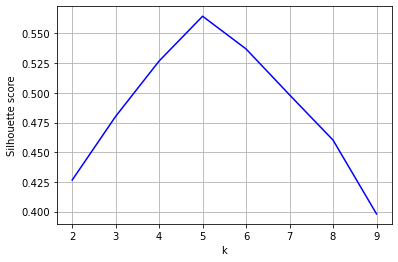

In [16]:
# visualising the results
plt.plot(sil.keys(), sil.values(), 'b-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

By the silhouette method the optimal number is also 5. The two methods show the same result. 